# Los geht's mit Machine Learning!

Herzlich willkommen zu einem kompakten und schnellen Einstieg in das Maschinelle Lernen mit Hilfe der Python-Bibliothek **scikit-learn**.

Wozu diese Bibliothek? Diese Machine-Learning Bibliothek hilft Ihnen alle möglichen Probleme rund um die Themen

- Regression
- Klassifikation
- Clustering
    
rasch und effektiv zu lösen. Dabei bedeutet *Machine-Learning* (deutsch: Maschinelles Lernen), dass der Computer anhand von Daten sogenannte *Modelle* lernt, die diese Probleme für Sie lösen.

Aber jetzt erstmal: was bitte schön bedeuten diese drei Begriffe aus dem Bereich des Maschinellen Lernens?

**1. Regression:**
Hier geht es darum, Maschinelles Lernen zu verwenden, um Werte möglichst gut vorhersagen zu können.

Beispiel: Sie haben einen Webshop für Modellflugzeuge und entsprechendes Zubehör. Als Eingabe haben Sie vier Informationen zu Ihrem Kunden:

- Geschlecht
- Alter
- Wohnort
- Umsatz: Für wieviel Geld bestellt der Kunde durchschnittlich jährlich bei Ihnen

Sie haben solche Angaben für 1000 Kunden. Jetzt wollen Sie ein Modell anhand von diesen 1000 Beispielkunden (= *Trainingsdaten*) erlernen, das Ihnen nur aus den Informationen Geschlecht, Alter und Wohnort vorhersagt, wieviel Umsatz Ihnen ein Kunde in etwa durchschnittlich jährlich machen wird:

          (Geschlecht, Alter, Wohnort)
                      |
                      |
                      v
     ------------------------------------
      Machine Learning Modell (Regressor)
     ------------------------------------
                      |
                      |
                      v
         prädizierter durchschnittlicher
         jährlicher Umsatz für diesen Kunden
    
Haben Sie diese drei Informationen zu einem Kunden, können Sie dann sozusagen in die Zukunft schauen, d.h. vorhersagen (*prädizieren*), wieviel Umsatz Ihnen dieser Kunde in Zukunft bescheren wird.


**2. Klassifikation:**
Hier geht es darum, Maschinelles Lernen zu verwenden, um Daten grob zu klassifizieren.

Bleiben wir einfach bei dem obigen Beispiel. Sie könnten Ihre Kunden zum Beispiel in

* Klasse 1: Premium-Kunden mit einem durschnittlichen Umsatz > 1000€ / Jahr
* Klasse 2: Basis-Kunden mit einem durchschnittlichen Umsatz zwischen 100€ und 1000€ / Jahr
* Klasse 3: Gelegenheits-Kunden mit einem durchschnittlichen Umsatz < 100€ / Jahr

einteilen. Also in 3 sogenannte *Klassen*.

Jetzt können Sie versuchen ein Modell wieder anhand von Trainingsdaten zu erlernen, dass bei Eingabe von Geschlecht, Alter, Wohnort die entsprechende Klasse vorhersagt:


            (Geschlecht, Alter, Wohnort)
                        |
                        |
                        v
     -----------------------------------------
      Machine Learning Modell (Klassifikator)
     -----------------------------------------
                        |
                        |
                        v
                Klasse 1, 2 oder 3?
                
**3. Clustering**

Hier geht es darum, Maschinelles Lernen zu verwenden, um Strukturen in Daten zu erkennen und meist auch zu visualisieren.

Wir bleiben immer noch bei dem Webshop-Beispiel. Greifen wir uns mal zwei Merkmale unserer Kunden heraus: das Alter und den durschnittlichen Umsatz / Jahr. Das heißt, jetzt wäre jeder der 1000 Beispielkunden als ein 2D-Merkmalsvektor beschrieben:

    (Alter, Umsatz)

Wenn wir jetzt jeden dieser 1000 Kunden als 2D-Punkt in ein (Alter, Umsatz)-Diagramm plotten, könnten es sein, dass schon alleine durch das Hinschauen gewissen Strukturen erkennbar sind.

Um das als Beispiel zu verdeutlichen, erzeugen wir hier mal ein paar Beispieldaten. Keine Sorge, Sie müssen den Python-Code an dieser Stelle noch nicht verstehen!

In [84]:
import numpy as np
kunden = []
anz_kunden = 1000
for i in range(0, anz_kunden):    
    alter = np.random.randint(low=18, high=99)    
    
    if alter<25: 
        # junge Kunden haben noch nicht so viel Geld
        # und kaufen sehr günstige Modellflieger
        umsatz = np.random.normal(loc=100, scale=30.0)
        
    elif alter>25 and alter<65:
        # berufstätige Kunden haben viel Geld für teueres Spielzeug
        # und kaufen Profi-Spielzeug
        umsatz = np.random.normal(loc=300, scale=40.0)
        
    else:
        # ältere Kunden bestellen nur einfache Modellflieger für Ihre Enkel
        umsatz = np.random.normal(loc=50, scale=25.0)
    
    neuer_kunde = (alter, umsatz)
    kunden.append( neuer_kunde )

Diese Beispieldaten können wir jetzt in zwei separate Liste entpacken und dann plotten:

In [85]:
liste_alter, liste_umsaetze = zip(*kunden)

In [86]:
liste_alter[:5]

(31, 91, 78, 20, 39)

In [87]:
liste_umsaetze[:5]

(301.93313579649976,
 41.254371174944296,
 81.14199757721128,
 79.22901557011804,
 287.6688880097133)

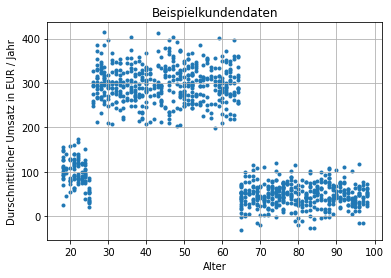

In [88]:
from matplotlib import pyplot as plt

plt.scatter(liste_alter, liste_umsaetze, marker=".")
plt.xlabel("Alter")
plt.ylabel("Durschnittlicher Umsatz in EUR / Jahr")
plt.grid()
plt.title("Beispielkundendaten")
plt.show()

Ein Maschinelles Lernverfahren zum sogenannten *Clustering* könnte diese drei gut voneinander abgegrenzten Ballungen (der Fachbegriff lautet *Cluster*) im (Alter, Umsatz)-Merkmalsraum erkennen und uns mitteilen, dass es drei Cluster gefunden hat und deren räumliche Ausdehnung beschreiben. Wie? Zum Beispiel durch einen Mittelpunkt jeden Clusters und einen Schätzung des jeweiligen Clusteradius.

In diesem einfachen zwei-dimensionalen Fall würde uns Menschen auch eine Visualisierung reichen. Aber was ist, wenn der Merkmalsvektor eines Kunden 6-dimensional ist, weil er viele Informationen enthält? Eine Visualisierung ist nicht mehr direkt möglich (nur noch indirekt über Dimensionsreduktionsverfahren) und trotzdem kann es auch in diesem 6-dimensionalen Merkmalsraum Ballungen geben, die wertvolle Informationen über Kundenmuster enthalten. Ein Clustering-Verfahren kann uns dann hier helfen, die Anzahl, Lage und Ausbreitung der Cluster herauszufinden.

# Ein paar Hintergründe zu scikit-learn

Die Bibliothek scikit-learn wurde im Jahre 2007 von David Cournapeau als ein "Google Summer of Code Projekt" ins Leben gerufen. Bei diesem Projekt arbeiten Studenten begleitend mit Mentoren von Firmen an einem realen Projekt. Die erste Version wurde jedoch erst im Januar 2010 veröffentlicht, nachdem Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort and Vincent Michel - alle vom *Institut national de recherche en informatique et en automatique (INRIA)*, zu deutsch: Nationales Forschungsinstitut für Informatik und Automatisierung - das Projekt übernahmen.

Inzwischen ist scikit-learn ein Open-Source-Projekt, das von Freiwilligen weiterentwickelt wird und jeder kann beitragen. Den Originalcode findet man übrigens unter:

https://github.com/scikit-learn/scikit-learn

scikit-learn ist zu großen Teilen in Python geschrieben und nutzt die Bibliothek *NumPy (Numerical Python)* sehr intensiv für die Umsetzung wichtiger Linearer-Algebra-Operationen. Einige Algorithmen sind aber auch in *Cython* geschrieben. Cython erlaubt die Kombination von Python und C und damit insbesondere die Anbindung von externen Bibliotheken an den Standard CPython-Interpreter. Der CPython-Interpreter ist übrigens der Interpreter, der Ihren Python-Code ausführt! Einige Machine-Learning-Verfahren wie z.B. die *Support Vector Machines (SVM)* werden mittels Cython in Python zur Verfügung gestellt. Im Hintergrund läuft dann aber eine bekannte und altbewährte C-Implementierung namens LIBSVM der Support-Vektor-Maschinen. Einfach gesagt: scikit-learn ist in großen Teilen Python-Code, aber besteht auch aus viel C-Code.

Die aktuelle Version im März 2021 von scikit-learn ist die Version 0.24 und unter

https://scikit-learn.org/stable/install.html

können Sie nachlesen, wie Sie scikit-learn auf Ihrem System installieren können. Unter Linux mittels des `conda`-Paketmanagers geht es zum Beispiel recht einfach mittels:

    conda install scikit-learn
    
    
Übrigens wird die Bibliothek korrekt als *scikit-learn* berzeichnet und geschrieben und _nicht_ etwa:

* scikit
* SciKit
* sci-kit learn
    

 